In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('default')
import Madan as md

/Users/dylanparodi/opt/anaconda3/envs/MADAN/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Users/dylanparodi/opt/anaconda3/envs/MADAN/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1

In [4]:
#load in node and edge list (from extract_full_nodes)
nodes = pd.read_csv("final_connectome_node_table.csv") 
edges = pd.read_csv("final_connectome_edge_table.csv")

In [7]:
def filter_by_layer(nodes, edges, layer):
    '''
    Extract subgraphs from June connectome data by layer for analysis
    Parameters: 
        nodes (Pandas dataframe) final june node dataframe
        edges (Pandas dataframe) final june edge dataframe 
        layer (string) layer of interest to extract
    Return: 
        node table subgraph (Pandas dataframe) by layer
        edge table subgraph (Pandas dataframe) by layer
        Subgraph G (NetworkX graph object)
    '''

    # Filter entire node table to only those in layer 
    rslt_synapse_df = nodes[nodes['layer'] == layer] 
    
    # Get list of unique neurons
    list_of_neurons = set(rslt_synapse_df['pt_root_id'].to_list())

    # Filter the synapse tables  extract all unique connections between nodes
    filtered = edges[edges['Source'].isin(list_of_neurons)]
    filtered2 = filtered[filtered['Target'].isin(list_of_neurons)]

    # create graph object
    G = nx.from_pandas_edgelist(filtered2, source="Source", target="Target", create_using=nx.DiGraph, edge_attr="Euclidean_Distance")
    list_of_current_nodes = set(list(G.nodes))
    missing_nodes = list(list_of_current_nodes ^ list_of_neurons)
    G.add_nodes_from(missing_nodes)
    
    return rslt_synapse_df, filtered2, G

### Layer 1

In [8]:
node_df_L1, edge_df_L1, G_L1 = filter_by_layer(nodes, edges, 'L1')  # sample run for subgraph L1

In [9]:
node_df_L1 = node_df_L1.reset_index()
node_df_L1 = node_df_L1.drop(columns=['index','Unnamed: 0'], axis=1)
node_df_L1 = node_df_L1.drop_duplicates(subset=['pt_root_id'])

In [10]:
node_df_hot_L1 = pd.get_dummies(node_df_L1, columns=["cell_polarity","subclass"], prefix={"Cell Type","Cell Classification"})
node_df_hot_L1 = node_df_hot_L1.drop(['id','timestamp','unique_pre_syn_target_count','unique_post_syn_target_count'],axis=1)
node_df_hot_L1 = node_df_hot_L1.rename(columns={'pre_syn_count':'out degree','post_syn_count':'in degree'})

In [11]:
node_df_L1['subclass'].unique()

array(['23P', 'NGC', 'MC', 'BPC', 'BC', '5P-PT', '4P'], dtype=object)

In [12]:
node_df_hot_L1

,pt_root_id,pt_position,layer,out degree,in degree,Cell Classification_excitatory,Cell Classification_inhibitory,Cell Type_23P,Cell Type_4P,Cell Type_5P-PT,Cell Type_BC,Cell Type_BPC,Cell Type_MC,Cell Type_NGC
0,864691136740606812,[282608 103808 20318],L1,93.0,6802.0,1,0,1,0,0,0,0,0,0
1,864691135463500869,[261040 103568 19671],L1,602.0,4492.0,1,0,1,0,0,0,0,0,0
2,864691136199051157,[290608 84320 24817],L1,235.0,2105.0,1,0,1,0,0,0,0,0,0
3,864691136311834173,[105328 109056 20813],L1,42.0,3350.0,1,0,1,0,0,0,0,0,0
4,864691135567738604,[251200 102352 18621],L1,80.0,4588.0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,864691135501873474,[256880 101424 18112],L1,129.0,4810.0,1,0,1,0,0,0,0,0,0
1285,864691135771586555,[348368 97248 15497],L1,13.0,894.0,0,1,0,0,0,0,1,0,0
1286,864691135194551082,[193296 106240 18412],L1,2024.0,3424.0,0,1,0,0,0,0,0,0,1
1287,864691135354901967,[360224 86496 25046],L1,21.0,2760.0,1,0,1,0,0,0,0,0,0


In [13]:
node_attributes_L1=['in degree','out degree',
        'Cell Type_23P', 'Cell Type_4P','Cell Type_5P-PT',
        'Cell Type_BC', 'Cell Type_BPC','Cell Type_MC','Cell Type_NGC',
        'Cell Classification_excitatory','Cell Classification_inhibitory']

In [14]:
for index, row in node_df_hot_L1.iterrows():
     node_attr_dict_L1={k: float(row.to_dict()[k]) for k in node_attributes_L1}
     G_L1.nodes[row['pt_root_id']].update(node_attr_dict_L1)

In [15]:
madan_L1=md.Madan(G_L1, attributes=['in degree','out degree',
        'Cell Type_23P', 'Cell Type_4P','Cell Type_5P-PT',
        'Cell Type_BC', 'Cell Type_BPC','Cell Type_MC','Cell Type_NGC',
        'Cell Classification_excitatory','Cell Classification_inhibitory'])

2022-08-09 12:07:43,305:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


In [16]:
madan_L1.compute_concentration(1000)
madan_L1.concentration

array([0.99999866, 0.99999866, 0.25243116, ..., 1.        , 1.        ,
       1.        ])

In [17]:
anomalous_nodes_L1 = madan_L1.anomalous_nodes

In [74]:
len(anomalous_nodes_L1)

54

In [ ]:
anomalies_L1 = []
for i in anomalous_nodes_L1:
    anomalies_L1.append(node_df_L1.iloc[i]["pt_root_id"])
anomalies_L1

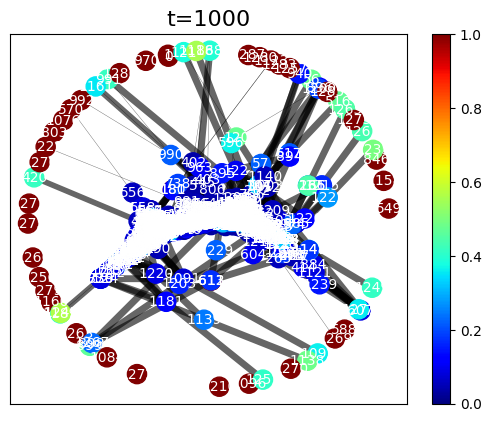

: 

In [104]:
plt.style.use('default')
madan_L1.plot_graph_concentration()

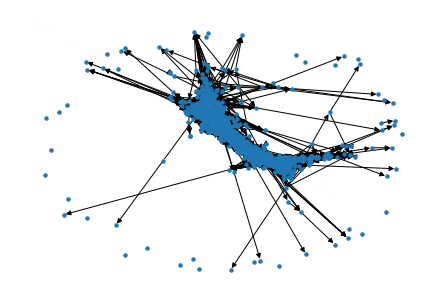

In [121]:
nx.draw(G_L1, node_size=15)

### Layer 2/3

In [27]:
node_df_L23, edge_df_L23, G_L23 = filter_by_layer(nodes, edges, "L23")  # sample run for subgraph L23

In [28]:
node_df_L23 = node_df_L23.reset_index()
node_df_L23 = node_df_L23.drop(columns=['index','Unnamed: 0'], axis=1)
node_df_L23 = node_df_L23.drop_duplicates(subset=['pt_root_id'])

In [29]:
node_df_L23_hot = pd.get_dummies(node_df_L23, columns=["cell_polarity","subclass"], prefix={"Cell Type","Cell Classification"})
node_df_L23_hot = node_df_L23_hot.drop(['id','timestamp','unique_pre_syn_target_count','unique_post_syn_target_count'],axis=1)
node_df_L23_hot = node_df_L23_hot.rename(columns={'pre_syn_count':'out degree','post_syn_count':'in degree'})

In [30]:
node_df_L23['subclass'].unique()

array(['23P', 'BPC', 'BC', 'NGC', 'MC', '4P', '5P-PT'], dtype=object)

In [31]:
node_attributes_L23=['in degree','out degree',
        'Cell Type_23P', 'Cell Type_4P',
        'Cell Type_5P-PT', 'Cell Type_BC', 'Cell Type_BPC','Cell Type_MC','Cell Type_NGC',
        'Cell Classification_excitatory','Cell Classification_inhibitory']

In [32]:
node_df_L23_hot

,pt_root_id,pt_position,layer,out degree,in degree,Cell Classification_excitatory,Cell Classification_inhibitory,Cell Type_23P,Cell Type_4P,Cell Type_5P-PT,Cell Type_BC,Cell Type_BPC,Cell Type_MC,Cell Type_NGC
0,864691135695974042,[150880 111632 24610],L23,260.0,4928.0,1,0,1,0,0,0,0,0,0
1,864691135416006330,[217072 132656 19736],L23,222.0,3591.0,1,0,1,0,0,0,0,0,0
2,864691135733291156,[305536 121200 20212],L23,41.0,3921.0,1,0,1,0,0,0,0,0,0
3,864691135974854346,[295200 123808 17670],L23,133.0,6305.0,1,0,1,0,0,0,0,0,0
4,864691135478435270,[217840 122528 16234],L23,309.0,3863.0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14068,864691135394016245,[167664 126320 19345],L23,60.0,2540.0,1,0,1,0,0,0,0,0,0
14069,864691135403724270,[254560 107232 17475],L23,46.0,4481.0,1,0,1,0,0,0,0,0,0
14070,864691135571211757,[239920 112864 17348],L23,86.0,4757.0,1,0,1,0,0,0,0,0,0
14071,864691136966016974,[165808 118256 20198],L23,782.0,5362.0,1,0,1,0,0,0,0,0,0


In [33]:
for index, row in node_df_L23_hot.iterrows():
     node_attr_dict_L23={k: float(row.to_dict()[k]) for k in node_attributes_L23}
     G_L23.nodes[row['pt_root_id']].update(node_attr_dict_L23)

In [34]:
madan_L23=md.Madan(G_L23, attributes=['in degree','out degree',
        'Cell Type_23P', 'Cell Type_4P',
        'Cell Type_5P-PT', 'Cell Type_BC', 'Cell Type_BPC','Cell Type_MC','Cell Type_NGC',
        'Cell Classification_excitatory','Cell Classification_inhibitory'])

2022-08-09 12:12:39,299:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!
2022-08-09 12:12:39,730:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (14049 x 14049) may take some time.


In [35]:
madan_L23.compute_concentration(1000)
madan_L23.concentration

array([0.33009049, 0.35769505, 0.01595057, ..., 1.        , 1.        ,
       1.        ])

In [37]:
anomalous_nodes_L23 = madan_L23.anomalous_nodes
len(madan_L23.anomalous_nodes)

449

In [38]:
anomalies_L23 = []
for i in anomalous_nodes_L23:
    anomalies_L23.append(node_df_L23.iloc[i]["pt_root_id"])
anomalies_L23

[864691135780822352,
 864691135571381797,
 864691135427661042,
 864691135373706313,
 864691136444115331,
 864691136487247990,
 864691135516250579,
 864691135748489352,
 864691135737634929,
 864691135113135513,
 864691135864244094,
 864691136725024630,
 864691136050995443,
 864691134964428319,
 864691135571273253,
 864691135341053381,
 864691135758851150,
 864691136903026610,
 864691135617778319,
 864691134964627487,
 864691135864467582,
 864691135345191071,
 864691136123744294,
 864691136116177828,
 864691136443747971,
 864691135516165075,
 864691135488572218,
 864691135194477098,
 864691135385349717,
 864691136824991716,
 864691135754555090,
 864691136699051382,
 864691135100179232,
 864691136334327475,
 864691135582028397,
 864691136876281454,
 864691135581099204,
 864691135761547574,
 864691135494032784,
 864691135274395877,
 864691136280739223,
 864691136311791933,
 864691136740425564,
 864691135991830721,
 864691136818708590,
 864691135776154029,
 864691136272953790,
 864691136601

### Layer 4

In [45]:
node_df_L4, edge_df_L4, G_L4 = filter_by_layer(nodes, edges, 'L4')  # sample run for subgraph L4

In [46]:
node_df_L4 = node_df_L4.reset_index()
node_df_L4 = node_df_L4.drop(columns=['index','Unnamed: 0'], axis=1)
node_df_L4 = node_df_L4.drop_duplicates(subset=['pt_root_id'])

In [47]:
node_df_L4_hot = pd.get_dummies(node_df_L4, columns=["cell_polarity","subclass"], prefix={"Cell Type","Cell Classification"})
node_df_L4_hot = node_df_L4_hot.drop(['id','timestamp','unique_pre_syn_target_count','unique_post_syn_target_count'],axis=1)
node_df_L4_hot = node_df_L4_hot.rename(columns={'pre_syn_count':'out degree','post_syn_count':'in degree'})

In [48]:
node_df_L4['subclass'].unique()

array(['4P', '23P', 'MC', 'BC', '5P-PT', '5P-IT', 'BPC', 'NGC'],
      dtype=object)

In [49]:
node_attributes_L4=['in degree','out degree',
        'Cell Type_23P', 'Cell Type_4P',
        'Cell Type_5P-IT', 'Cell Type_5P-PT',
        'Cell Type_BC', 'Cell Type_BPC','Cell Type_MC','Cell Type_NGC',
        'Cell Classification_excitatory','Cell Classification_inhibitory']

In [50]:
node_df_L4_hot

,pt_root_id,pt_position,layer,out degree,in degree,Cell Classification_excitatory,Cell Classification_inhibitory,Cell Type_23P,Cell Type_4P,Cell Type_5P-IT,Cell Type_5P-PT,Cell Type_BC,Cell Type_BPC,Cell Type_MC,Cell Type_NGC
0,864691135366988025,[110208 153664 23546],L4,28.0,2203.0,1,0,0,1,0,0,0,0,0,0
1,864691136194511948,[166512 174176 24523],L4,422.0,2048.0,1,0,0,1,0,0,0,0,0,0
2,864691135337690598,[275616 135120 24873],L4,104.0,4508.0,1,0,1,0,0,0,0,0,0,0
3,864691135162203437,[128128 166528 24710],L4,393.0,2438.0,1,0,0,1,0,0,0,0,0,0
4,864691135345049330,[164144 165872 22646],L4,489.0,3032.0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17344,864691136008451244,[298848 149344 17641],L4,65.0,1259.0,1,0,0,1,0,0,0,0,0,0
17345,864691135501851485,[132224 167104 17053],L4,135.0,1318.0,1,0,0,1,0,0,0,0,0,0
17346,864691135394020597,[126368 177328 26334],L4,21.0,1408.0,1,0,0,1,0,0,0,0,0,0
17347,864691135864051838,[169584 139392 18199],L4,320.0,3409.0,1,0,1,0,0,0,0,0,0,0


In [51]:
for index, row in node_df_L4_hot.iterrows():
     node_attr_dict_L4={k: float(row.to_dict()[k]) for k in node_attributes_L4}
     G_L4.nodes[row['pt_root_id']].update(node_attr_dict_L4)

In [52]:
madan_L4=md.Madan(G_L4, attributes=['in degree','out degree',
        'Cell Type_23P', 'Cell Type_4P',
        'Cell Type_5P-IT', 'Cell Type_5P-PT',
        'Cell Type_BC', 'Cell Type_BPC','Cell Type_MC','Cell Type_NGC',
        'Cell Classification_excitatory','Cell Classification_inhibitory'])

2022-08-09 12:37:49,213:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!
2022-08-09 12:37:49,930:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (17339 x 17339) may take some time.


In [53]:
madan_L4.compute_concentration(1000)
madan_L4.concentration

array([0.99158851, 0.81965377, 0.67201391, ..., 1.        , 1.        ,
       1.        ])

In [54]:
anomalous_nodes_L4 = madan_L4.anomalous_nodes
len(madan_L4.anomalous_nodes)

307

In [55]:
anomalies_L4 = []
for i in anomalous_nodes_L4:
    anomalies_L4.append(node_df_L4.iloc[i]["pt_root_id"])
anomalies_L4

[864691135366988025,
 864691135732558996,
 864691135614417867,
 864691136090907060,
 864691135134710041,
 864691135467938188,
 864691136602223313,
 864691136590913910,
 864691136134430603,
 864691135615781225,
 864691135809853388,
 864691135012563190,
 864691135700281211,
 864691136723491325,
 864691135593619243,
 864691136422838831,
 864691137054006902,
 864691135345246367,
 864691135772131579,
 864691136048170120,
 864691134940152931,
 864691136866902638,
 864691135462734398,
 864691135875982931,
 864691135776606560,
 864691136031795643,
 864691136134418571,
 864691136236655119,
 864691135445838738,
 864691135386843521,
 864691135081710583,
 864691136436858782,
 864691135577200901,
 864691135781142096,
 864691135345160095,
 864691136143898676,
 864691135754582994,
 864691135586618052,
 864691135476514216,
 864691135013326230,
 864691135357815794,
 864691135303158439,
 864691135994381258,
 864691135207765369,
 864691135740649579,
 864691135348295895,
 864691135748600361,
 864691135753

### Layer 5

In [59]:
node_df_L5, edge_df_L5, G_L5 = filter_by_layer(nodes, edges, 'L5')  # sample run for subgraph L5

In [60]:
node_df_L5 = node_df_L5.reset_index()
node_df_L5 = node_df_L5.drop(columns=['index','Unnamed: 0'], axis=1)
node_df_L5 = node_df_L5.drop_duplicates(subset=['pt_root_id'])

In [64]:
node_df_L5_hot = pd.get_dummies(node_df_L5, columns=["cell_polarity","subclass"], prefix={"Cell Type","Cell Classification"})
node_df_L5_hot = node_df_L5_hot.drop(['id','timestamp','unique_pre_syn_target_count','unique_post_syn_target_count'],axis=1)
node_df_L5_hot = node_df_L5_hot.rename(columns={'pre_syn_count':'out degree','post_syn_count':'in degree'})

In [65]:
node_df_L5['subclass'].unique()

array(['5P-IT', '4P', '5P-PT', 'BC', '6P-IT', 'MC', '5P-NP', '6P-CT',
       'NGC', '23P', 'BPC'], dtype=object)

In [66]:
node_attributes_L5=['in degree','out degree',
        'Cell Type_23P', 'Cell Type_4P',
        'Cell Type_5P-IT', 'Cell Type_5P-NP','Cell Type_5P-PT','Cell Type_6P-CT',
        'Cell Type_6P-IT','Cell Type_BC', 'Cell Type_BPC','Cell Type_MC','Cell Type_NGC',
        'Cell Classification_excitatory','Cell Classification_inhibitory']

In [67]:
node_df_L5_hot

,pt_root_id,pt_position,layer,out degree,in degree,Cell Classification_excitatory,Cell Classification_inhibitory,Cell Type_23P,Cell Type_4P,Cell Type_5P-IT,Cell Type_5P-NP,Cell Type_5P-PT,Cell Type_6P-CT,Cell Type_6P-IT,Cell Type_BC,Cell Type_BPC,Cell Type_MC,Cell Type_NGC
0,864691135454103402,[277360 188592 17546],L5,354.0,2707.0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,864691135502005173,[180624 193904 17703],L5,295.0,2597.0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,864691136031647163,[127216 177904 17254],L5,397.0,2813.0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,864691135117818589,[331776 168544 18409],L5,413.0,8022.0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,864691135991244746,[284848 187728 21257],L5,225.0,3145.0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13451,864691135194735914,[174432 200608 21567],L5,737.0,2812.0,0,1,0,0,0,0,0,0,0,0,0,1,0
13452,864691135807191325,[172816 181296 24036],L5,64.0,4795.0,1,0,0,0,0,0,0,0,0,0,0,1,0
13453,864691135758928206,[169424 203744 25789],L5,493.0,4414.0,1,0,0,0,1,0,0,0,0,0,0,0,0
13454,864691135987423624,[215520 168592 15216],L5,54.0,874.0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [68]:
for index, row in node_df_L5_hot.iterrows():
     node_attr_dict_L5={k: float(row.to_dict()[k]) for k in node_attributes_L5}
     G_L5.nodes[row['pt_root_id']].update(node_attr_dict_L5)

In [69]:
madan_L5=md.Madan(G_L5, attributes=['in degree','out degree',
        'Cell Type_23P', 'Cell Type_4P',
        'Cell Type_5P-IT', 'Cell Type_5P-NP','Cell Type_5P-PT','Cell Type_6P-CT',
        'Cell Type_6P-IT','Cell Type_BC', 'Cell Type_BPC','Cell Type_MC','Cell Type_NGC',
        'Cell Classification_excitatory','Cell Classification_inhibitory'])

2022-08-09 13:33:12,942:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!
2022-08-09 13:33:13,523:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (13439 x 13439) may take some time.


In [70]:
madan_L5.compute_concentration(1000)
madan_L5.concentration

array([0.60931703, 0.40775444, 0.60550695, ..., 1.        , 1.        ,
       1.        ])

In [71]:
anomalous_nodes_L5 = madan_L5.anomalous_nodes
len(madan_L5.anomalous_nodes)

292

In [72]:
anomalies_L5= []
for i in anomalous_nodes_L5:
    anomalies_L5.append(node_df_L5.iloc[i]["pt_root_id"])
anomalies_L5

[864691135117818589,
 864691135565007191,
 864691135571535909,
 864691135590302731,
 864691135593502763,
 864691136065555352,
 864691135509062386,
 864691135403713774,
 864691136105779929,
 864691135445561234,
 864691136361498338,
 864691137019964014,
 864691136672660103,
 864691135953792008,
 864691135617750671,
 864691136039810558,
 864691135848175198,
 864691135850641607,
 864691135292222390,
 864691135759933629,
 864691135082132471,
 864691135939294721,
 864691135528125426,
 864691135968889445,
 864691135609442823,
 864691135488160498,
 864691135366959865,
 864691135615874883,
 864691135994673866,
 864691135809838284,
 864691135765764029,
 864691135939305473,
 864691135537424114,
 864691135568927110,
 864691136951664863,
 864691135517314756,
 864691135274063589,
 864691135684560020,
 864691135509199881,
 864691135501570370,
 864691135373624393,
 864691135728812948,
 864691135991491521,
 864691135730106297,
 864691135122338599,
 864691136296720155,
 864691135730144697,
 864691135939

### Layer 6

In [73]:
node_df_L6, edge_df_L6, G_L6 = filter_by_layer(nodes, edges, 'L6')  # sample run for subgraph L6

In [75]:
node_df_L6 = node_df_L6.reset_index()
node_df_L6 = node_df_L6.drop(columns=['index','Unnamed: 0'], axis=1)
node_df_L6 = node_df_L6.drop_duplicates(subset=['pt_root_id'])

In [79]:
node_df_L6_hot = pd.get_dummies(node_df_L6, columns=["cell_polarity","subclass"], prefix={"Cell Type","Cell Classification"})
node_df_L6_hot = node_df_L6_hot.drop(['id','timestamp','unique_pre_syn_target_count','unique_post_syn_target_count'],axis=1)
node_df_L6_hot = node_df_L6_hot.rename(columns={'pre_syn_count':'out degree','post_syn_count':'in degree'})

In [80]:
node_df_L6['subclass'].unique()

array(['6P-IT', '5P-IT', 'MC', '6P-CT', '5P-NP', 'BC', 'NGC', 'BPC',
       '5P-PT', '23P', '4P'], dtype=object)

In [81]:
node_attributes_L6=['in degree','out degree',
        'Cell Type_23P', 'Cell Type_4P',
        'Cell Type_5P-IT', 'Cell Type_5P-NP','Cell Type_5P-PT','Cell Type_6P-CT',
        'Cell Type_6P-IT','Cell Type_BC', 'Cell Type_BPC','Cell Type_MC','Cell Type_NGC',
        'Cell Classification_excitatory','Cell Classification_inhibitory']

In [82]:
node_df_L6_hot

,pt_root_id,pt_position,layer,out degree,in degree,Cell Classification_excitatory,Cell Classification_inhibitory,Cell Type_23P,Cell Type_4P,Cell Type_5P-IT,Cell Type_5P-NP,Cell Type_5P-PT,Cell Type_6P-CT,Cell Type_6P-IT,Cell Type_BC,Cell Type_BPC,Cell Type_MC,Cell Type_NGC
0,864691135497604883,[134208 247184 18598],L6,111.0,2125.0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,864691135570708973,[111936 209952 15602],L6,10.0,959.0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,864691135181696258,[227344 214656 19093],L6,264.0,3269.0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,864691134917529098,[187504 208768 18182],L6,158.0,6564.0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,864691135876029523,[243600 225056 18607],L6,93.0,1735.0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18644,864691135995395530,[321296 201904 22597],L6,150.0,3099.0,1,0,0,0,0,0,0,0,0,0,0,1,0
18645,864691135837576851,[179744 240896 23595],L6,50.0,2584.0,1,0,0,0,0,0,0,1,0,0,0,0,0
18646,864691136002091427,[385856 218656 23074],L6,66.0,1073.0,1,0,0,0,0,0,0,1,0,0,0,0,0
18647,864691135575395102,[341552 232224 20021],L6,235.0,2022.0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [96]:
for index, row in node_df_L6_hot.iterrows():
     node_attr_dict_L6={k: float(row.to_dict()[k]) for k in node_attributes_L6}
     G_L6.nodes[row['pt_root_id']].update(node_attr_dict_L6)

In [97]:
madan_L6=md.Madan(G_L6, attributes=['in degree','out degree',
        'Cell Type_23P', 'Cell Type_4P',
        'Cell Type_5P-IT', 'Cell Type_5P-NP','Cell Type_5P-PT','Cell Type_6P-CT',
        'Cell Type_6P-IT','Cell Type_BC', 'Cell Type_BPC','Cell Type_MC','Cell Type_NGC',
        'Cell Classification_excitatory','Cell Classification_inhibitory'])

2022-08-09 14:12:17,488:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!
2022-08-09 14:12:18,131:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (18626 x 18626) may take some time.


In [98]:
madan_L6.compute_concentration(1000)
madan_L6.concentration

array([0.01723076, 0.64458363, 0.72439534, ..., 1.        , 1.        ,
       1.        ])

In [99]:
anomalous_nodes_L6 = madan_L6.anomalous_nodes
len(madan_L6.anomalous_nodes)

85

In [100]:
anomalies_L6 = []
for i in anomalous_nodes_L6:
    anomalies_L6.append(node_df_L6.iloc[i]["pt_root_id"])
anomalies_L6

[864691135373857224,
 864691136023748665,
 864691136436865694,
 864691136116457892,
 864691135182051074,
 864691135748926505,
 864691135639002171,
 864691136925337162,
 864691135337683430,
 864691136134406795,
 864691134784325628,
 864691135674599876,
 864691136329083626,
 864691135780784976,
 864691135654032834,
 864691135113134745,
 864691135926319316,
 864691136534887842,
 864691135468293714,
 864691136010907555,
 864691135474982720,
 864691135440480328,
 864691135699627298,
 864691135156017508,
 864691135322936732,
 864691135428490800,
 864691135162235949,
 864691135415457722,
 864691135012418806,
 864691135859013224,
 864691135615790441,
 864691136312145469,
 864691136090945716,
 864691136814606958,
 864691135012532982,
 864691135544440360,
 864691135440484680,
 864691135776929888,
 864691135517955012,
 864691135488246074,
 864691135760458685,
 864691135396707361,
 864691136521810833,
 864691135360433735,
 864691136723503101,
 864691136039362558,
 864691136041059158,
 864691136237

### White Matter

In [83]:
node_df_WM, edge_df_WM, G_WM = filter_by_layer(nodes, edges, 'WM')  # sample run for subgraph WM

In [84]:
node_df_WM = node_df_WM.reset_index()
node_df_WM = node_df_WM.drop(columns=['index','Unnamed: 0'], axis=1)
node_df_WM = node_df_WM.drop_duplicates(subset=['pt_root_id'])

In [85]:
node_df_WM_hot = pd.get_dummies(node_df_WM, columns=["cell_polarity","subclass"], prefix={"Cell Type","Cell Classification"})
node_df_WM_hot = node_df_WM_hot.drop(['id','timestamp','unique_pre_syn_target_count','unique_post_syn_target_count'],axis=1)
node_df_WM_hot = node_df_WM_hot.rename(columns={'pre_syn_count':'out degree','post_syn_count':'in degree'})

In [86]:
node_df_WM['subclass'].unique()

array(['5P-PT', '6P-CT', '6P-IT', 'MC', '5P-NP', 'BPC', 'BC'],
      dtype=object)

In [88]:
node_attributes_WM=['in degree','out degree',
        'Cell Type_5P-NP','Cell Type_5P-PT','Cell Type_6P-CT',
        'Cell Type_6P-IT','Cell Type_BC', 'Cell Type_BPC','Cell Type_MC',
        'Cell Classification_excitatory','Cell Classification_inhibitory']

In [87]:
node_df_WM_hot

,pt_root_id,pt_position,layer,out degree,in degree,Cell Classification_excitatory,Cell Classification_inhibitory,Cell Type_5P-NP,Cell Type_5P-PT,Cell Type_6P-CT,Cell Type_6P-IT,Cell Type_BC,Cell Type_BPC,Cell Type_MC
0,864691135135121689,[212192 248560 15403],WM,28.0,667.0,1,0,0,1,0,0,0,0,0
1,864691134964734239,[342160 252256 24380],WM,235.0,832.0,1,0,0,0,1,0,0,0,0
2,864691135700041620,[340480 253104 25152],WM,332.0,2168.0,1,0,0,0,1,0,0,0,0
3,864691135695947162,[272928 254640 24485],WM,145.0,1297.0,1,0,0,0,1,0,0,0,0
4,864691135083697440,[392832 251536 22993],WM,41.0,1144.0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,864691135478293446,[274368 240384 16416],WM,24.0,650.0,1,0,0,0,0,1,0,0,0
176,864691136723313661,[226224 254496 18368],WM,539.0,2966.0,1,0,0,0,0,1,0,0,0
177,864691136723590397,[288768 254160 23318],WM,142.0,1315.0,1,0,0,0,1,0,0,0,0
178,864691136584041378,[344208 246912 20462],WM,130.0,1819.0,1,0,0,0,0,1,0,0,0


In [89]:
for index, row in node_df_WM_hot.iterrows():
     node_attr_dict_WM={k: float(row.to_dict()[k]) for k in node_attributes_WM}
     G_WM.nodes[row['pt_root_id']].update(node_attr_dict_WM)

In [91]:
madan_WM=md.Madan(G_WM, attributes=['in degree','out degree',
        'Cell Type_5P-NP','Cell Type_5P-PT','Cell Type_6P-CT',
        'Cell Type_6P-IT','Cell Type_BC', 'Cell Type_BPC','Cell Type_MC',
        'Cell Classification_excitatory','Cell Classification_inhibitory'])

2022-08-09 14:08:26,532:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


In [92]:
madan_WM.compute_concentration(1000)
madan_WM.concentration

array([0.67676285, 0.67679648, 0.90431176, 0.09915694, 0.10000377,
       0.09757769, 0.99972406, 0.68905814, 0.68870625, 0.08929412,
       0.08913243, 0.08819419, 0.08863945, 0.08973457, 0.09205197,
       0.08946252, 0.08887162, 0.0886801 , 0.08850584, 0.08788709,
       0.08954011, 0.08951137, 0.09000579, 0.08795013, 1.        ,
       0.87789527, 0.52159181, 0.12708414, 0.11163945, 0.08919284,
       0.08983226, 0.08896002, 0.08929728, 0.08759659, 0.08911487,
       0.08966727, 0.08821809, 0.08929922, 0.08794699, 0.09032695,
       0.09028146, 0.08941438, 1.        , 0.99996326, 0.09465901,
       1.        , 0.08937784, 0.09142909, 0.08829968, 0.08936941,
       1.        , 0.09029275, 0.09044813, 0.08886469, 0.08877276,
       0.08885125, 0.08931122, 0.08787039, 0.08779511, 0.08784674,
       0.10540128, 0.10145942, 0.10061014, 0.99992464, 0.08861137,
       0.08834916, 0.08929716, 0.08931353, 0.12870024, 0.12027015,
       1.        , 0.5216706 , 0.52126358, 0.58748601, 0.09981

In [94]:
anomalous_nodes_WM = madan_WM.anomalous_nodes
len(madan_WM.anomalous_nodes)

0

In [95]:
anomalies_WM = []
for i in anomalous_nodes_WM:
    anomalies_WM.append(node_df_WM.iloc[i]["pt_root_id"])
anomalies_WM

[]